# 📦 TFM - Predicción de calificacion de reseña (Olist)

**Autor:** Jose Fernando Cañal Capano  
**Máster:** Master en Data Science                                                   
**Fecha:** Julio 2025

---


**Esquema del Codigo:**


1.   Configuracion Inicial
2.   Lectura de Documentos
3.   Union de las Diferentes Bases de Datos
4.   Creacion de Variables
5.   Analisis Exploratorio
6.   Creacion de BD para Modelos
7.   Ejecucion de los Diferentes Modelos
8.   Resultado Final





#Configuracion Inicial#

In [ ]:
# Importar librerías
import os
import kagglehub
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import datetime as dt
import time, warnings
from matplotlib.ticker import FuncFormatter
from pandas.plotting import scatter_matrix
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import scipy.stats as stats
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")



In [ ]:
# Download latest version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brazilian-ecommerce


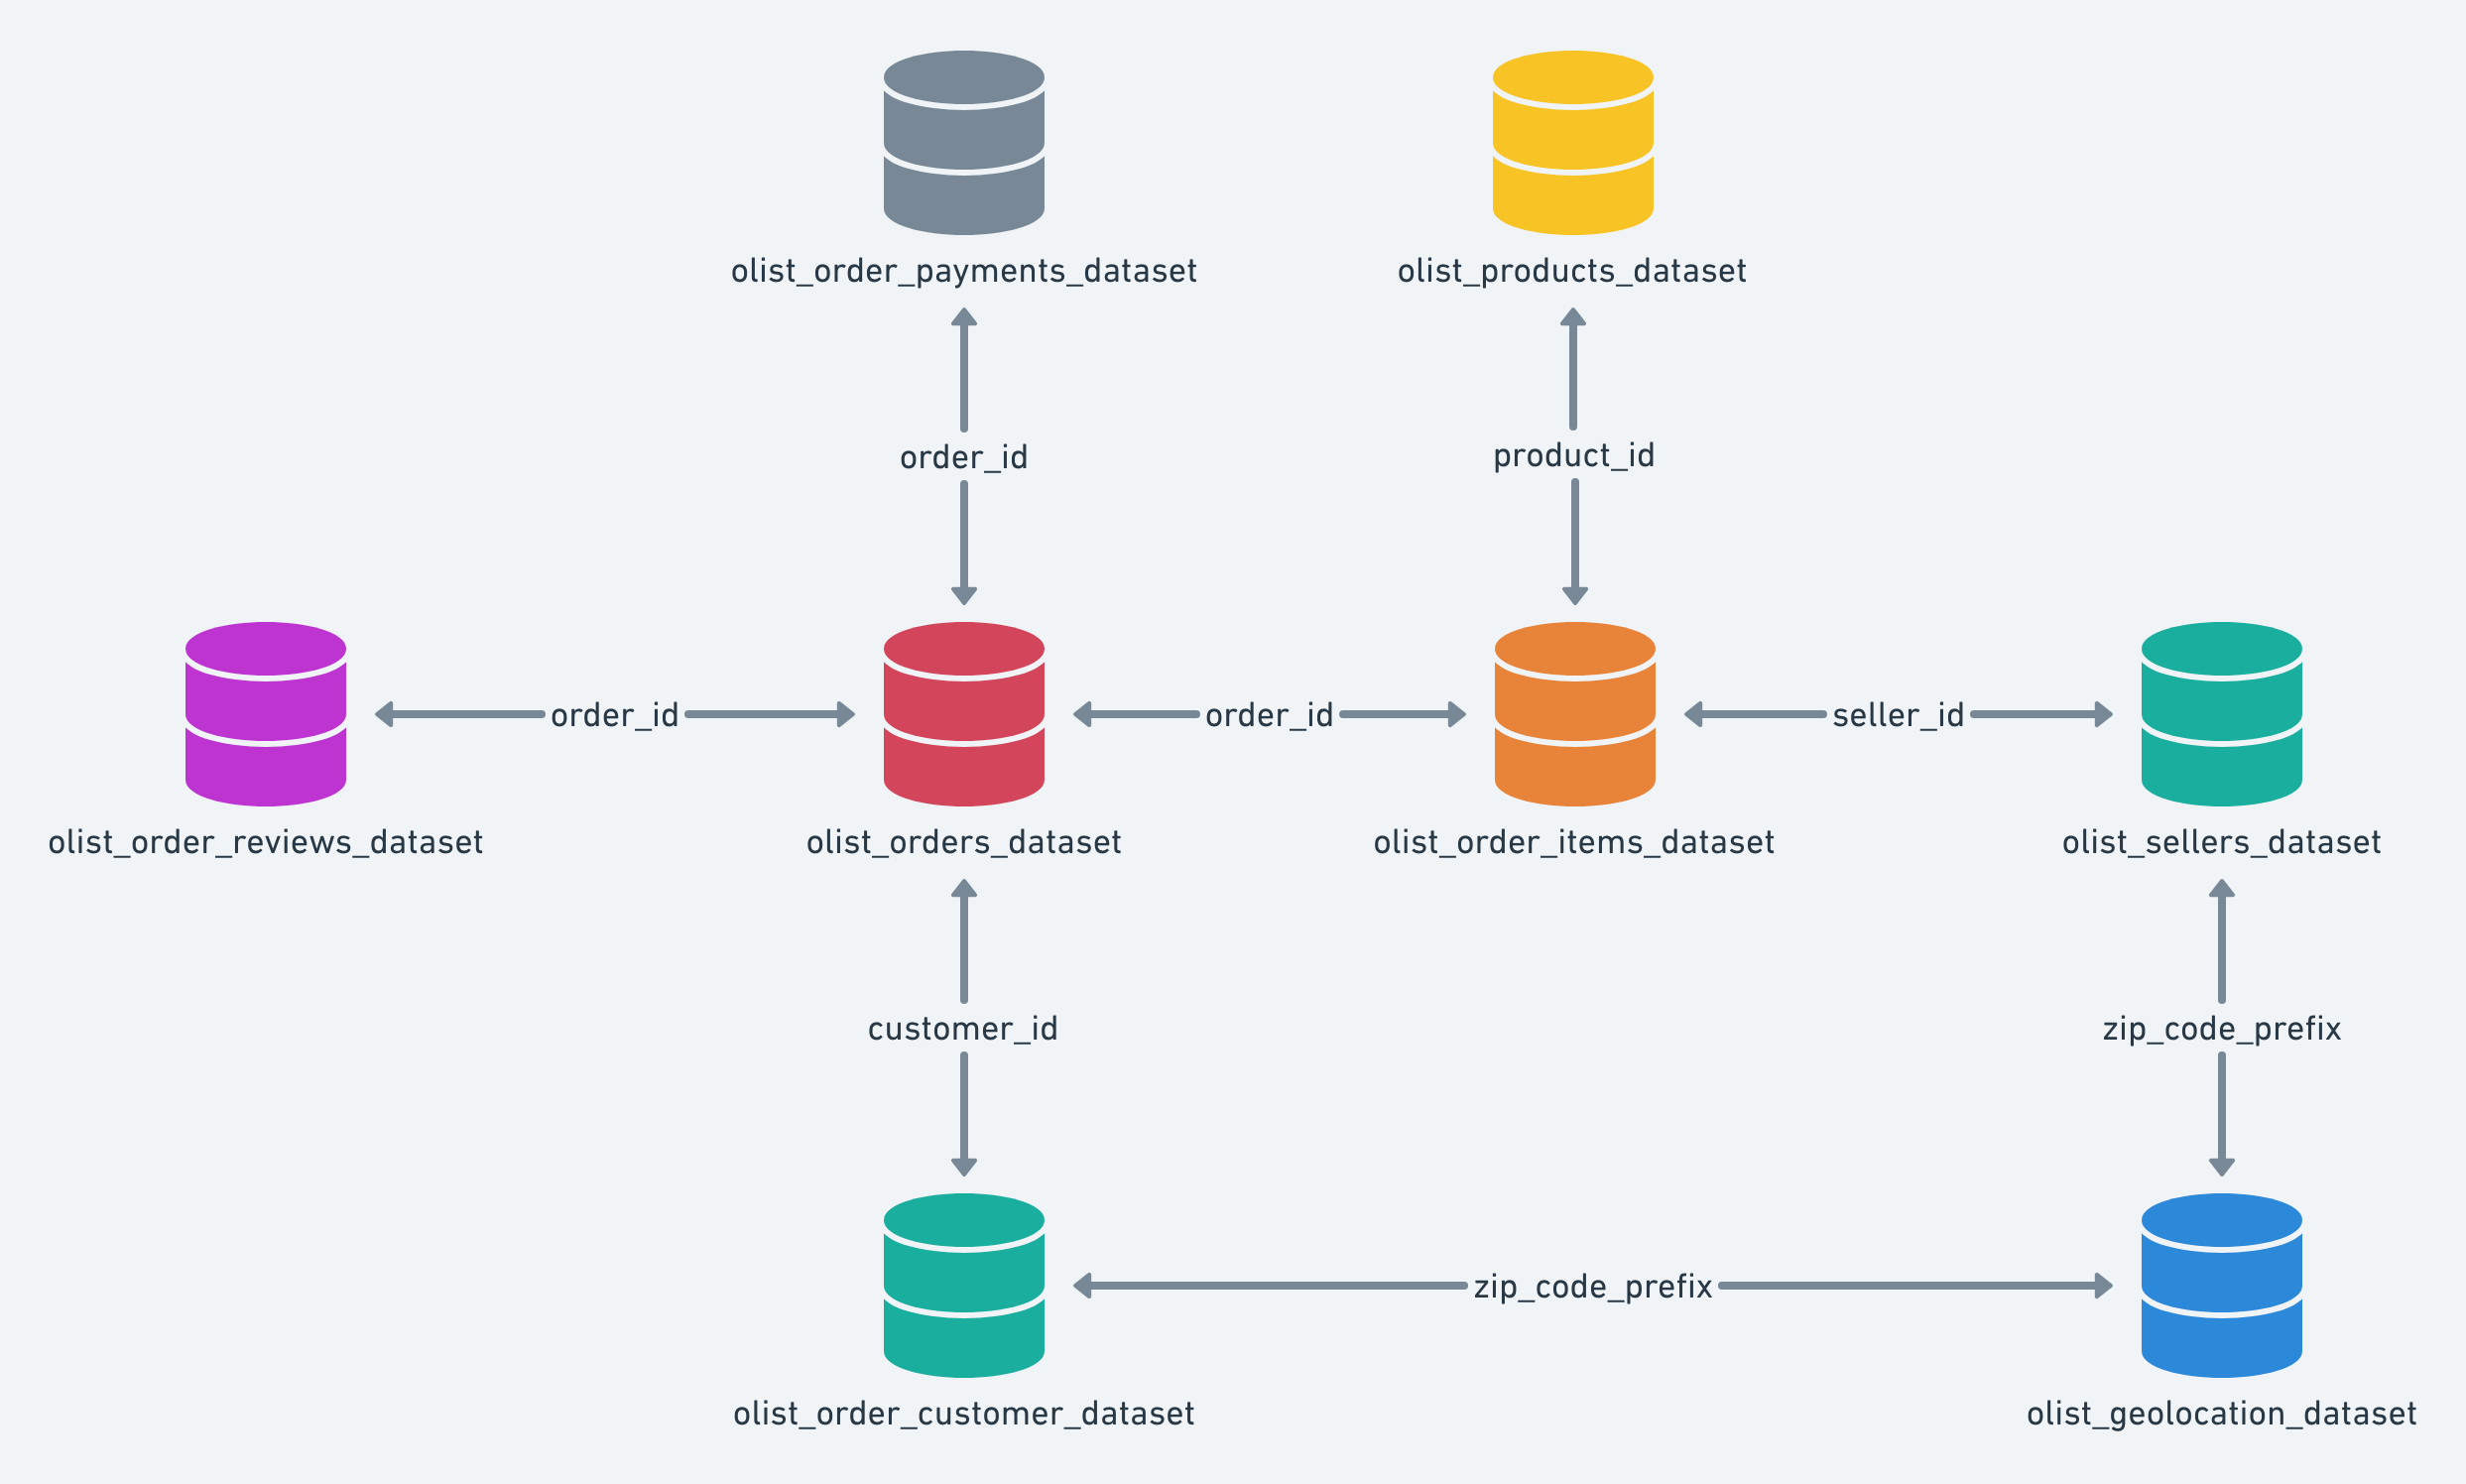

#Lectura de Documentos

In [ ]:
#Leer los documentos
df_item = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv")
df_reviews = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv")
df_orders = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv")
df_products = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv")
df_geolocation = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv")
df_sellers = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv")
df_payments = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv")
df_customers = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv")
df_category = pd.read_csv("/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv")

#Union de las Diferentes Base de Datos

In [ ]:
#Comenzando vemos la estructura de la base de datos donde esta la variable que queremos predecir
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
#Unir las bases de datos de ordenes con reviews
df_ordenes_reviews = df_orders.merge(df_reviews, on='order_id', how='left')
df_ordenes_reviews.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51


In [ ]:
#Ver tipos de datos de las columnas
df_ordenes_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99992 entries, 0 to 99991
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99992 non-null  object 
 1   customer_id                    99992 non-null  object 
 2   order_status                   99992 non-null  object 
 3   order_purchase_timestamp       99992 non-null  object 
 4   order_approved_at              99831 non-null  object 
 5   order_delivered_carrier_date   98199 non-null  object 
 6   order_delivered_customer_date  97005 non-null  object 
 7   order_estimated_delivery_date  99992 non-null  object 
 8   review_id                      99224 non-null  object 
 9   review_score                   99224 non-null  float64
 10  review_comment_title           11568 non-null  object 
 11  review_comment_message         40977 non-null  object 
 12  review_creation_date           99224 non-null 

In [ ]:
#Convertir tiempos a datetime
df_ordenes_reviews["order_purchase_timestamp"] = pd.to_datetime(df_ordenes_reviews.order_purchase_timestamp)
df_ordenes_reviews["order_approved_at"] = pd.to_datetime(df_ordenes_reviews.order_approved_at)
df_ordenes_reviews["order_estimated_delivery_date"] = pd.to_datetime(df_ordenes_reviews.order_estimated_delivery_date)
df_ordenes_reviews["order_delivered_customer_date"] = pd.to_datetime(df_ordenes_reviews.order_delivered_customer_date)

In [ ]:
#Verificar si cambio a datetime
df_ordenes_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99992 entries, 0 to 99991
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99992 non-null  object        
 1   customer_id                    99992 non-null  object        
 2   order_status                   99992 non-null  object        
 3   order_purchase_timestamp       99992 non-null  datetime64[ns]
 4   order_approved_at              99831 non-null  datetime64[ns]
 5   order_delivered_carrier_date   98199 non-null  object        
 6   order_delivered_customer_date  97005 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99992 non-null  datetime64[ns]
 8   review_id                      99224 non-null  object        
 9   review_score                   99224 non-null  float64       
 10  review_comment_title           11568 non-null  object        
 11  review_comment_

In [ ]:
#Ver informacion de item para poder arrastrar precio de una orden
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
#Crear una nueva bd para poder ver el precio por orden
df_item_nueva = df_item
df_item_nueva = df_item_nueva.groupby('order_id')[["price", "freight_value","order_item_id"]].sum().reset_index()
df_item_nueva = df_item_nueva.rename(columns={"order_item_id": "item_count"})
df_item_nueva.head()

,order_id,price,freight_value,item_count
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,1
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,1
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,1
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,1


In [ ]:
#Verificar los tipos de datos
df_item_nueva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98666 entries, 0 to 98665
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       98666 non-null  object 
 1   price          98666 non-null  float64
 2   freight_value  98666 non-null  float64
 3   item_count     98666 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.0+ MB


In [ ]:
#Ver informacion de payments
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
#Crear bd nueva para transformar payments
df_payments_nueva = df_payments

#Codificar la columna de payment_sequential a si se realizo mas de un pago
df_payments_nueva['more_one_pay_type'] = df_payments_nueva.groupby('order_id')['payment_value'].transform('count') > 1

#Codificar la columna de payment_installments a si se uso mas de un metodo de pago
df_payments_nueva['total_order_payments'] = df_payments_nueva.groupby('order_id')['payment_installments'].transform('sum')

#Quitar columnas que no necesitamos
df_payments_nueva = df_payments_nueva.drop(columns=["payment_sequential", "payment_installments","payment_value", "payment_type"])

df_payments_nueva.head()

,order_id,more_one_pay_type,total_order_payments
0,b81ef226f3fe1789b1e8b2acac839d17,False,8
1,a9810da82917af2d9aefd1278f1dcfa0,False,1
2,25e8ea4e93396b6fa0d3dd708e76c1bd,False,1
3,ba78997921bbcdc1373bb41e913ab953,False,8
4,42fdf880ba16b47b59251dd489d4441a,False,2


In [ ]:
#Quitar duplicados de tabla
df_payments_nueva = df_payments_nueva.drop_duplicates(subset=['order_id'])

In [ ]:
#Verificar que no hay duplicados
df_payments_nueva.duplicated().sum()

np.int64(0)

In [ ]:
#Ver informacion de la nueva bd
df_payments_nueva.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99440 entries, 0 to 103885
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   order_id              99440 non-null  object
 1   more_one_pay_type     99440 non-null  bool  
 2   total_order_payments  99440 non-null  int64 
dtypes: bool(1), int64(1), object(1)
memory usage: 2.4+ MB


In [ ]:
#Unir las dos bases de datos
df_item_payment = df_item_nueva.merge(df_payments_nueva, on='order_id', how='left')
df_item_payment.head()

,order_id,price,freight_value,item_count,more_one_pay_type,total_order_payments
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,1,False,2.0
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,1,False,3.0
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,1,False,5.0
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,1,False,2.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,1,False,3.0


In [ ]:
#Ver informacion de la union
df_item_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98666 entries, 0 to 98665
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              98666 non-null  object 
 1   price                 98666 non-null  float64
 2   freight_value         98666 non-null  float64
 3   item_count            98666 non-null  int64  
 4   more_one_pay_type     98665 non-null  object 
 5   total_order_payments  98665 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 4.5+ MB


In [ ]:
#Creamos una ultima bd para unir la bd nueva con los costos con la anterior
df_todo = df_ordenes_reviews.merge(df_item_payment, on='order_id', how='left')
df_todo.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,price,freight_value,item_count,more_one_pay_type,total_order_payments
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,29.99,8.72,1.0,True,3.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,118.70,22.76,1.0,False,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,159.90,19.22,1.0,False,3.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,45.00,27.20,1.0,False,1.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51,19.90,8.72,1.0,False,1.0


In [ ]:
#Ver la informacion de la union de todas las bd
df_todo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99992 entries, 0 to 99991
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99992 non-null  object        
 1   customer_id                    99992 non-null  object        
 2   order_status                   99992 non-null  object        
 3   order_purchase_timestamp       99992 non-null  datetime64[ns]
 4   order_approved_at              99831 non-null  datetime64[ns]
 5   order_delivered_carrier_date   98199 non-null  object        
 6   order_delivered_customer_date  97005 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99992 non-null  datetime64[ns]
 8   review_id                      99224 non-null  object        
 9   review_score                   99224 non-null  float64       
 10  review_comment_title           11568 non-null  object        
 11  review_comment_

In [ ]:
#Quitar las columnas que le faltan muchos datos
df_todo.drop(columns=["review_comment_title","review_comment_message"],inplace=True)

In [ ]:
#Verificar si hay nulos
df_todo.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,161
order_delivered_carrier_date,1793
order_delivered_customer_date,2987
order_estimated_delivery_date,0
review_id,768
review_score,768


In [ ]:
#Quitar nulos
df_todo = df_todo.dropna()

In [ ]:
#Verificar la eliminacion de nulos
df_todo.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0
review_id,0
review_score,0


In [ ]:
#Verificar duplicados
df_todo.duplicated(subset=['order_id']).sum()

np.int64(529)

In [ ]:
#Quitar duplicados de tabla
df_todo = df_todo.drop_duplicates(subset=['order_id'])

In [ ]:
#Verificar duplicados
df_todo.duplicated(subset=['order_id']).sum()

np.int64(0)

In [ ]:
#Ver cuantos datos quedan luego de remover nulos y duplicados
df_todo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95814 entries, 0 to 99991
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       95814 non-null  object        
 1   customer_id                    95814 non-null  object        
 2   order_status                   95814 non-null  object        
 3   order_purchase_timestamp       95814 non-null  datetime64[ns]
 4   order_approved_at              95814 non-null  datetime64[ns]
 5   order_delivered_carrier_date   95814 non-null  object        
 6   order_delivered_customer_date  95814 non-null  datetime64[ns]
 7   order_estimated_delivery_date  95814 non-null  datetime64[ns]
 8   review_id                      95814 non-null  object        
 9   review_score                   95814 non-null  float64       
 10  review_creation_date           95814 non-null  object        
 11  review_answer_timest

#Creacion de Variables

In [ ]:
#Creacion de variables de dias estimados de envio y dias reales de envio
df_todo["eta_days"] = df_todo.order_estimated_delivery_date - df_todo.order_approved_at
df_todo["real_days"] = df_todo.order_delivered_customer_date - df_todo.order_approved_at
df_todo["delta_real_vs_eta"] = df_todo.real_days - df_todo.eta_days
df_todo["is_late"] = df_todo.real_days > df_todo.eta_days
df_todo["is_late"] = df_todo["is_late"].astype(int)
df_todo["day_of_week"] = df_todo.order_purchase_timestamp.dt.dayofweek
df_todo["day_of_week"] = df_todo["day_of_week"].astype(int)

#Para que solo diga el numero
df_todo["eta_days"] = df_todo["eta_days"].dt.days
df_todo["real_days"] = df_todo["real_days"].dt.days
df_todo["delta_real_vs_eta"] = df_todo["delta_real_vs_eta"].dt.days

df_todo.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,price,freight_value,item_count,more_one_pay_type,total_order_payments,eta_days,real_days,delta_real_vs_eta,is_late,day_of_week
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,29.99,8.72,1.0,True,3.0,15,8,-8,0,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4.0,...,118.70,22.76,1.0,False,1.0,17,12,-6,0,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5.0,...,159.90,19.22,1.0,False,3.0,26,9,-18,0,2
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5.0,...,45.00,27.20,1.0,False,1.0,26,13,-13,0,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5.0,...,19.90,8.72,1.0,False,1.0,12,2,-10,0,1


In [ ]:
#Verificar los typos de datos para ver cuales codificar
df_todo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95814 entries, 0 to 99991
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       95814 non-null  object        
 1   customer_id                    95814 non-null  object        
 2   order_status                   95814 non-null  object        
 3   order_purchase_timestamp       95814 non-null  datetime64[ns]
 4   order_approved_at              95814 non-null  datetime64[ns]
 5   order_delivered_carrier_date   95814 non-null  object        
 6   order_delivered_customer_date  95814 non-null  datetime64[ns]
 7   order_estimated_delivery_date  95814 non-null  datetime64[ns]
 8   review_id                      95814 non-null  object        
 9   review_score                   95814 non-null  float64       
 10  review_creation_date           95814 non-null  object        
 11  review_answer_timest

In [ ]:
#Crear bd codificada para modelos
df_todo_cod = df_todo

#Codificar "order_status"
df_todo_cod = pd.get_dummies(df_todo_cod, columns=["order_status"], drop_first=True)
df_todo_cod['order_status_delivered'] = df_todo_cod['order_status_delivered'].astype(int)

#Codficar "more_one_pay_type"
df_todo_cod['more_one_pay_type'] = df_todo_cod['more_one_pay_type'].astype(int)

df_todo_cod.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,...,freight_value,item_count,more_one_pay_type,total_order_payments,eta_days,real_days,delta_real_vs_eta,is_late,day_of_week,order_status_delivered
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,...,8.72,1.0,1,3.0,15,8,-8,0,0,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4.0,2018-08-08 00:00:00,...,22.76,1.0,0,1.0,17,12,-6,0,1,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5.0,2018-08-18 00:00:00,...,19.22,1.0,0,3.0,26,9,-18,0,2,1
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5.0,2017-12-03 00:00:00,...,27.20,1.0,0,1.0,26,13,-13,0,5,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5.0,2018-02-17 00:00:00,...,8.72,1.0,0,1.0,12,2,-10,0,1,1


In [ ]:
#Quitar todas las columnas no numericas
df_todo_cod = df_todo_cod.drop(columns=["customer_id",
                                        "order_purchase_timestamp",
                                        "order_approved_at",
                                        "order_delivered_carrier_date",
                                        "order_estimated_delivery_date",
                                        "order_delivered_customer_date",
                                        "review_id",
                                        "review_creation_date",
                                        "review_answer_timestamp",
                                        ])
df_todo_cod.head()

,order_id,review_score,price,freight_value,item_count,more_one_pay_type,total_order_payments,eta_days,real_days,delta_real_vs_eta,is_late,day_of_week,order_status_delivered
0,e481f51cbdc54678b7cc49136f2d6af7,4.0,29.99,8.72,1.0,1,3.0,15,8,-8,0,0,1
1,53cdb2fc8bc7dce0b6741e2150273451,4.0,118.70,22.76,1.0,0,1.0,17,12,-6,0,1,1
2,47770eb9100c2d0c44946d9cf07ec65d,5.0,159.90,19.22,1.0,0,3.0,26,9,-18,0,2,1
3,949d5b44dbf5de918fe9c16f97b45f8a,5.0,45.00,27.20,1.0,0,1.0,26,13,-13,0,5,1
4,ad21c59c0840e6cb83a9ceb5573f8159,5.0,19.90,8.72,1.0,0,1.0,12,2,-10,0,1,1


In [ ]:
#Verificar como quedaron los datos codificados
df_todo_cod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95814 entries, 0 to 99991
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                95814 non-null  object 
 1   review_score            95814 non-null  float64
 2   price                   95814 non-null  float64
 3   freight_value           95814 non-null  float64
 4   item_count              95814 non-null  float64
 5   more_one_pay_type       95814 non-null  int64  
 6   total_order_payments    95814 non-null  float64
 7   eta_days                95814 non-null  int64  
 8   real_days               95814 non-null  int64  
 9   delta_real_vs_eta       95814 non-null  int64  
 10  is_late                 95814 non-null  int64  
 11  day_of_week             95814 non-null  int64  
 12  order_status_delivered  95814 non-null  int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 10.2+ MB


#Analisis Exploratorio

In [ ]:
#Analisis estadistico de la variable "review_score"
df_todo.describe()["review_score"]

,review_score
count,95814.000000
mean,4.156125
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000
std,1.284654


In [ ]:
dist_review_score = df_todo["review_score"].value_counts().sort_index()
print(dist_review_score)

review_score
1.0     9346
2.0     2922
3.0     7908
4.0    18889
5.0    56749
Name: count, dtype: int64


In [ ]:
review_score_above_3 = df_todo[df_todo["review_score"]>3].shape[0]
print(f"La cantidad de reseñas buenas(arriba de tres) son: {review_score_above_3}")

La cantidad de reseñas buenas(arriba de tres) son: 75638


In [ ]:
review_score_below_4 = df_todo[df_todo["review_score"]<=3].shape[0]
print(f"La cantidad de reseñas malas(debajo de cuatro) son: {review_score_below_4}")

La cantidad de reseñas malas(debajo de cuatro) son: 20176


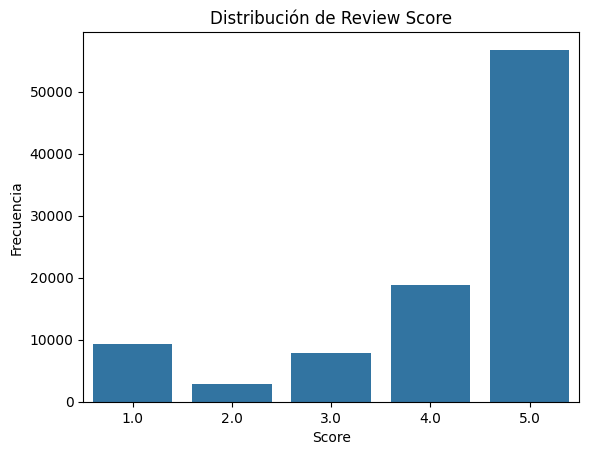

In [ ]:
#Distribucion de review_score
sns.countplot(data=df_todo, x='review_score')
plt.title('Distribución de Review Score')
plt.xlabel('Score')
plt.ylabel('Frecuencia')
plt.show()

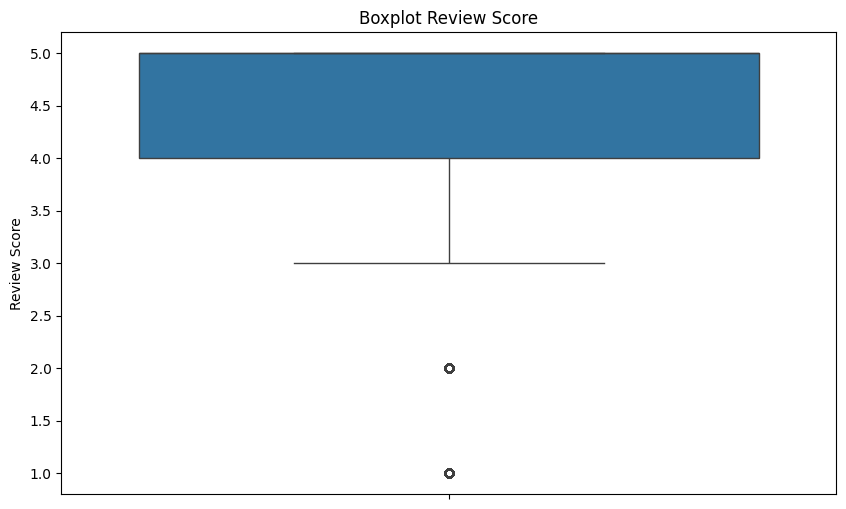

In [ ]:
#Boxplot de review score
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_todo, y='review_score')
plt.title('Boxplot Review Score')
plt.ylabel('Review Score')
plt.show()

No es el grafico apropiado ya que es una variable discreta

In [ ]:
#Analisis estadistico de la variable "price"
df_todo.describe()["price"]

,price
count,95814.000000
mean,136.800533
min,0.850000
25%,45.900000
50%,86.250000
75%,149.900000
max,13440.000000
std,207.796494


In [ ]:
#Calcular percentil 95 y 99 para hacer el histograma
percentil_95 = np.percentile(df_todo["price"], 95)
percentil_99 = np.percentile(df_todo["price"], 99)
print(f"Percentil 95 del precio: {percentil_95:.2f}")
print(f"Percentil 99 del precio: {percentil_99:.2f}")


Percentil 95 del precio: 399.00
Percentil 99 del precio: 990.00


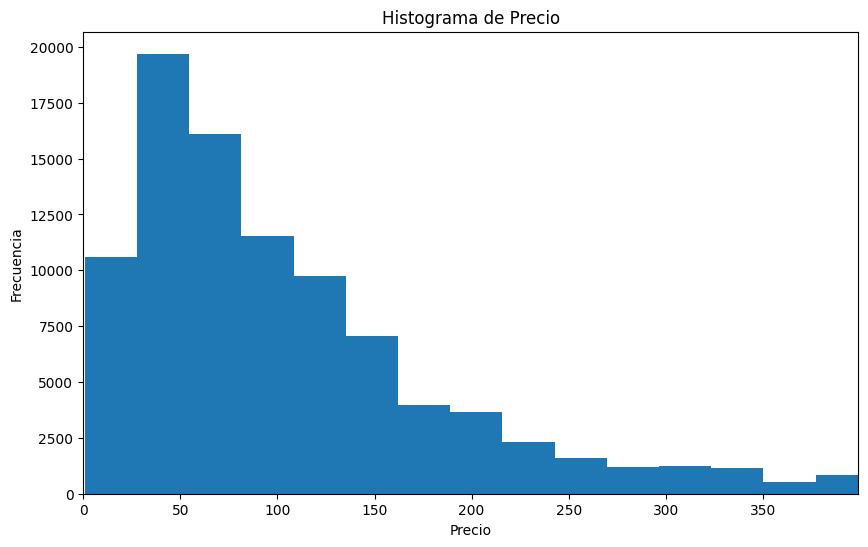

In [ ]:
#Histograma de precio
plt.figure(figsize=(10, 6))
plt.hist(df_todo["price"], bins=500)
plt.title('Histograma de Precio')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.xlim(0, 399)  # Ya que hay muchos outliers usaremos el percentil 95
plt.show()

In [ ]:
#Analisis estadistico de la variable "price"
df_todo.describe()["freight_value"]

,freight_value
count,95814.000000
mean,22.763111
min,0.000000
25%,13.840000
50%,17.160000
75%,23.990000
max,1794.960000
std,21.523623


In [ ]:
#Calcular percentil 95 y 99 para hacer el histograma
percentil_95_fv = np.percentile(df_todo["freight_value"], 95)
percentil_99_fv = np.percentile(df_todo["freight_value"], 99)
print(f"Percentil 95 del precio: {percentil_95_fv:.2f}")
print(f"Percentil 99 del precio: {percentil_95_fv:.2f}")

Percentil 95 del precio: 54.71
Percentil 99 del precio: 54.71


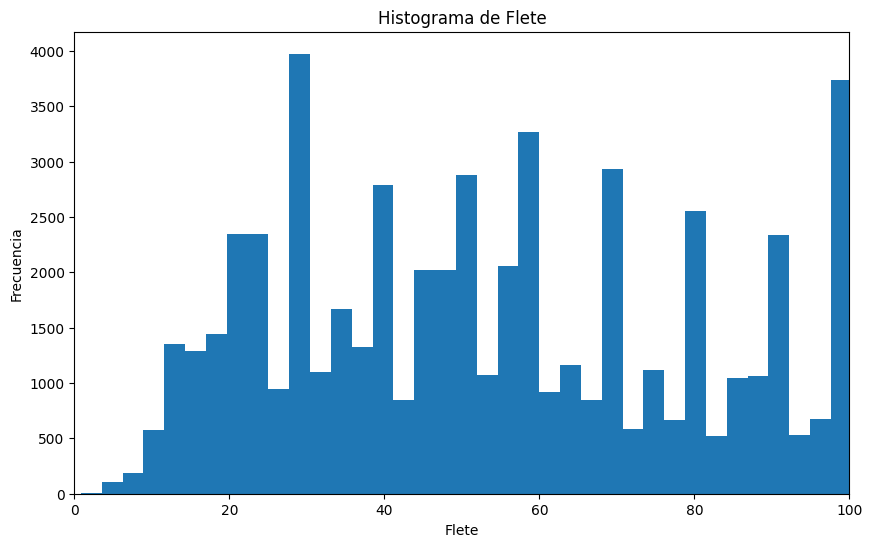

In [ ]:
#Histograma de frieght value
plt.figure(figsize=(10, 6))
plt.hist(df_todo["price"], bins=5000)
plt.title('Histograma de Flete')
plt.xlabel('Flete')
plt.ylabel('Frecuencia')
plt.xlim(0, 100)
plt.show()

In [ ]:
#Analisis estadistico de la variable "delta_real_vs_eta"
df_todo.describe()["delta_real_vs_eta"]

,delta_real_vs_eta
count,95814.000000
mean,-11.913259
min,-147.000000
25%,-17.000000
50%,-12.000000
75%,-7.000000
max,188.000000
std,10.111989


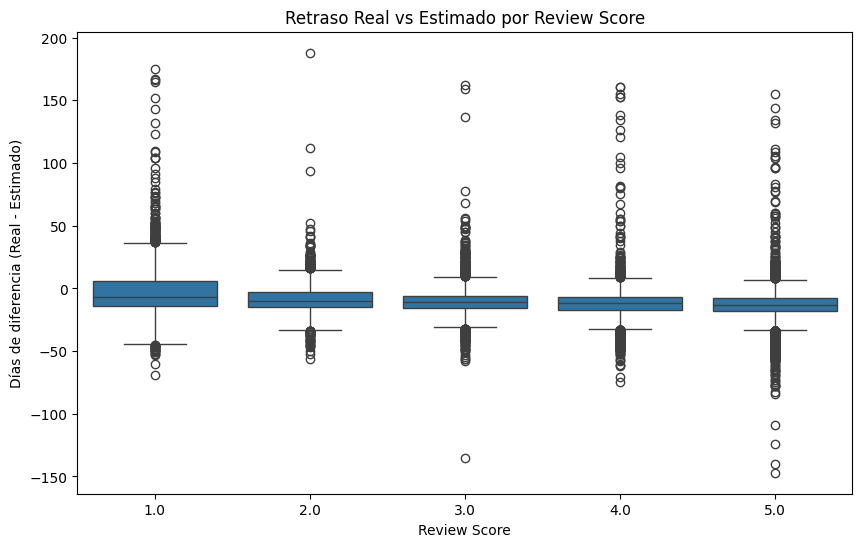

In [ ]:
#Boxplot de diferencia de estimado y real por review score
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_todo, x='review_score', y='delta_real_vs_eta')
plt.title('Retraso Real vs Estimado por Review Score')
plt.xlabel('Review Score')
plt.ylabel('Días de diferencia (Real - Estimado)')
plt.show()

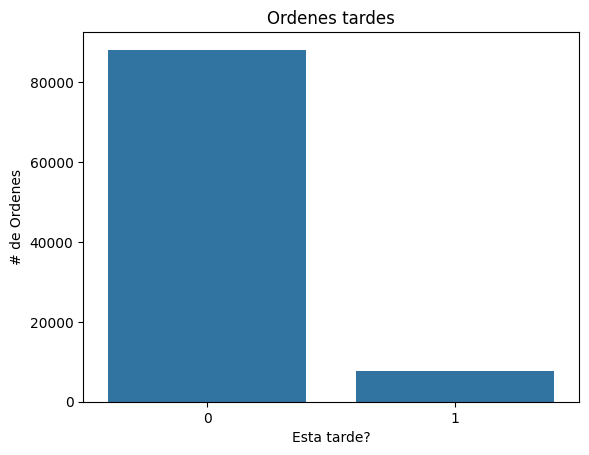

In [ ]:
#Diagrama de barra de ordenes tardes
sns.countplot(data=df_todo, x="is_late")
plt.title("Ordenes tardes")
plt.xlabel("Esta tarde?")
plt.ylabel("# de Ordenes")
plt.show()

In [ ]:
df_todo["is_late"].value_counts()

,count
is_late,
0,88154
1,7660


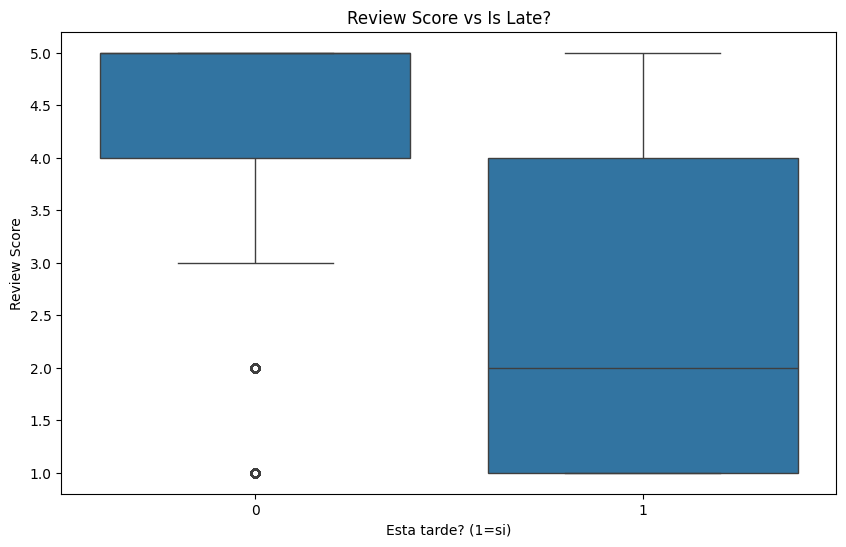

In [ ]:
#Boxplot de diferencia de estimado y real por review score
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_todo, x='is_late', y='review_score')
plt.title('Review Score vs Is Late?')
plt.xlabel('Esta tarde? (1=si)')
plt.ylabel('Review Score')
plt.show()

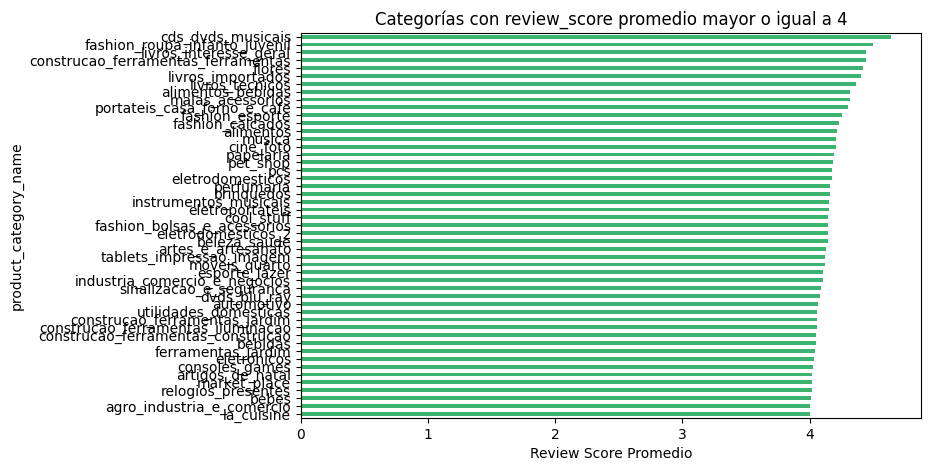

In [ ]:
#Crear una grafica para ver cuales son las categorias con un review score encima de 4 en adelante

#Unir productos con items
items_products = pd.merge(df_item, df_products, on='product_id', how='left')

#Unir con reviews
merged_df = pd.merge(items_products, df_reviews[['order_id', 'review_score']], on='order_id', how='left')

#Calcular el review score por categoria
category_scores = merged_df.groupby('product_category_name')['review_score'].mean()

#Filtrar los buenos reviews
high_score_categories = category_scores[category_scores >= 4].sort_values(ascending=False)

#Crear la grafica
high_score_categories.plot(kind='barh', figsize=(8, 5), color='mediumseagreen')
plt.xlabel('Review Score Promedio')
plt.title('Categorías con review_score promedio mayor o igual a 4')
plt.gca().invert_yaxis()
plt.show()


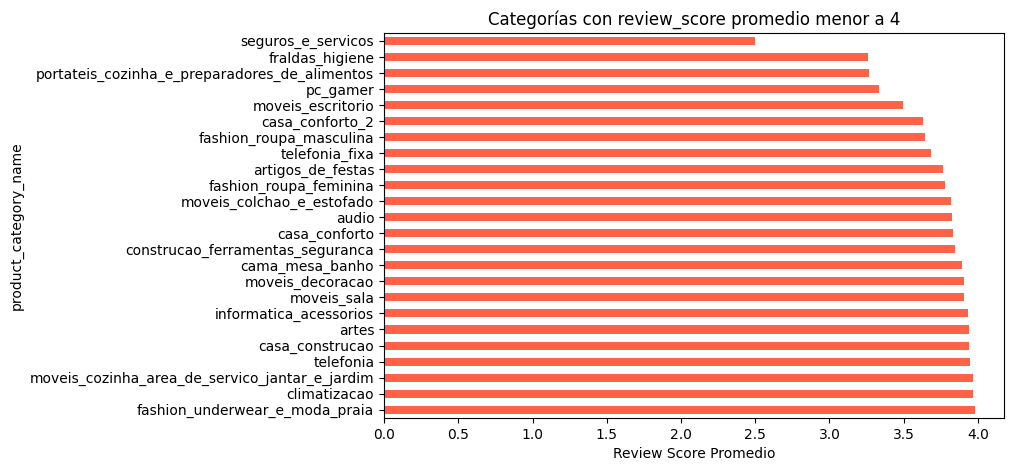

In [ ]:
#Crear una grafica para ver cuales son las categorias con un review score por debajo de 4

#Calcular el review score por categoria
category_scores = merged_df.groupby('product_category_name')['review_score'].mean()

#Filtrar los malos reviews
low_score_categories = category_scores[category_scores < 4].sort_values(ascending=True)

#Crear la grafica
low_score_categories.plot(kind='barh', figsize=(8, 5), color='tomato')
plt.xlabel('Review Score Promedio')
plt.title('Categorías con review_score promedio menor a 4')
plt.gca().invert_yaxis()
plt.show()

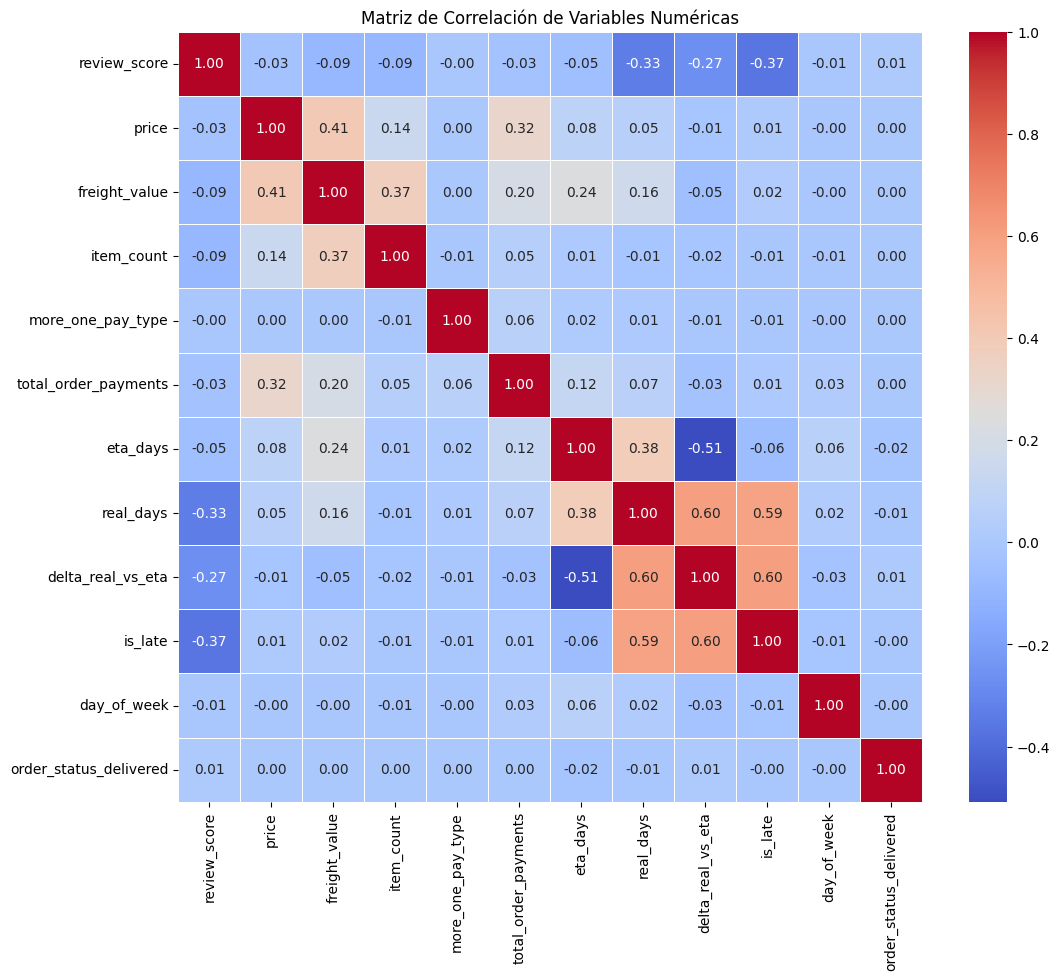

In [ ]:
#Matriz de correlacion
df_corr = df_todo_cod.drop(columns=["order_id"])
correlation_matrix = df_corr.corr()

#Visualizar la matriz
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f",cmap='coolwarm',linewidths=0.5)

plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()


#Redaccion de Hipotesis



1.   Las entregas retrasadas tienden a recibir puntuaciones más bajas
2.   Las entregas tempranas tienden a recibir puntuaciones mas altas
2.   Los pagos en cuotas podrían estar asociados a peores experiencias



#Creacion de BD para Modelos

In [ ]:
#Creacion de BD para Regresion Logistica
df_todo_reglog = df_todo_cod.drop(columns=["order_id"])
df_todo_reglog["review_bueno"] = df_todo_reglog["review_score"] > 3
df_todo_reglog['review_bueno'] = df_todo_reglog['review_bueno'].astype(int)
df_todo_reglog = df_todo_reglog.drop(columns=["review_score"])

df_todo_reglog.head()


,price,freight_value,item_count,more_one_pay_type,total_order_payments,eta_days,real_days,delta_real_vs_eta,is_late,day_of_week,order_status_delivered,review_bueno
0,29.99,8.72,1.0,1,3.0,15,8,-8,0,0,1,1
1,118.70,22.76,1.0,0,1.0,17,12,-6,0,1,1,1
2,159.90,19.22,1.0,0,3.0,26,9,-18,0,2,1,1
3,45.00,27.20,1.0,0,1.0,26,13,-13,0,5,1,1
4,19.90,8.72,1.0,0,1.0,12,2,-10,0,1,1,1


In [ ]:
#Creacion de BD para Regresion Lineal
df_todo_reg = df_todo_cod.drop(columns=["order_id"])
df_todo_reg.info()
df_todo_reg.head()

<class 'pandas.core.frame.DataFrame'>
Index: 95814 entries, 0 to 99991
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   review_score            95814 non-null  float64
 1   price                   95814 non-null  float64
 2   freight_value           95814 non-null  float64
 3   item_count              95814 non-null  float64
 4   more_one_pay_type       95814 non-null  int64  
 5   total_order_payments    95814 non-null  float64
 6   eta_days                95814 non-null  int64  
 7   real_days               95814 non-null  int64  
 8   delta_real_vs_eta       95814 non-null  int64  
 9   is_late                 95814 non-null  int64  
 10  day_of_week             95814 non-null  int64  
 11  order_status_delivered  95814 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 9.5 MB


,review_score,price,freight_value,item_count,more_one_pay_type,total_order_payments,eta_days,real_days,delta_real_vs_eta,is_late,day_of_week,order_status_delivered
0,4.0,29.99,8.72,1.0,1,3.0,15,8,-8,0,0,1
1,4.0,118.70,22.76,1.0,0,1.0,17,12,-6,0,1,1
2,5.0,159.90,19.22,1.0,0,3.0,26,9,-18,0,2,1
3,5.0,45.00,27.20,1.0,0,1.0,26,13,-13,0,5,1
4,5.0,19.90,8.72,1.0,0,1.0,12,2,-10,0,1,1


In [ ]:
#Creacion de BD para Regresion Lineal sin outliers
df_todo_reg = df_todo_cod.drop(columns=["order_id"])

# Columnas numéricas que pueden tener outliers
cols_to_check = [
    'price',
    'freight_value',
    'item_count',
    'total_order_payments',
    'real_days',
    'delta_real_vs_eta',
    'eta_days'
]

df_reg_clean = df_todo_reg.copy()  # Mantener copia del original

for col in cols_to_check:
    lower = df_reg_clean[col].quantile(0.01)
    upper = df_reg_clean[col].quantile(0.99)
    df_reg_clean = df_reg_clean[(df_reg_clean[col] >= lower) & (df_reg_clean[col] <= upper)]

print(f"Registros antes: {df_todo_reg.shape[0]}")
print(f"Registros después de limpiar outliers: {df_reg_clean.shape[0]}")


Registros antes: 95814
Registros después de limpiar outliers: 87239


In [ ]:
#Creacion de BD para Random Forest y Arbol de Decision
df_todo_rf = df_todo_cod.drop(columns=["order_id"])
df_todo_rf.head()

,review_score,price,freight_value,item_count,more_one_pay_type,total_order_payments,eta_days,real_days,delta_real_vs_eta,is_late,day_of_week,order_status_delivered
0,4.0,29.99,8.72,1.0,1,3.0,15,8,-8,0,0,1
1,4.0,118.70,22.76,1.0,0,1.0,17,12,-6,0,1,1
2,5.0,159.90,19.22,1.0,0,3.0,26,9,-18,0,2,1
3,5.0,45.00,27.20,1.0,0,1.0,26,13,-13,0,5,1
4,5.0,19.90,8.72,1.0,0,1.0,12,2,-10,0,1,1


In [ ]:
#Creacion de BD para XG Boost
df_todo_xgb = df_todo_cod.drop(columns=["order_id"])
df_todo_xgb['review_score'] = df_todo_xgb['review_score'].astype(int) - 1

df_todo_xgb.head()

,review_score,price,freight_value,item_count,more_one_pay_type,total_order_payments,eta_days,real_days,delta_real_vs_eta,is_late,day_of_week,order_status_delivered
0,3,29.99,8.72,1.0,1,3.0,15,8,-8,0,0,1
1,3,118.70,22.76,1.0,0,1.0,17,12,-6,0,1,1
2,4,159.90,19.22,1.0,0,3.0,26,9,-18,0,2,1
3,4,45.00,27.20,1.0,0,1.0,26,13,-13,0,5,1
4,4,19.90,8.72,1.0,0,1.0,12,2,-10,0,1,1


#Regresion Logistica

In [ ]:
#Dividir los datos en conjuntos de entrenamiento y prueba
X = df_todo_reglog.drop('review_bueno', axis=1)
y = df_todo_reglog['review_bueno']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

#Crear un modelo de Regresión Logística
model = LogisticRegression(random_state=42, max_iter=10000)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
print(f'Precisión del modelo Regresión Logística en Train: {accuracy_train}')

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy_reglog = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo Regresión Logística en Test: {accuracy_reglog}')

# Coeficientes del modelo
coef = pd.Series(model.coef_[0],index=X.columns)
print("\nPesos (coeficientes) del modelo final:")
print(coef.sort_values(ascending=False))

# Evaluo el modelo
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:")
print(conf_matrix)

#Reporte
report = classification_report(y_test, y_pred)
print('\nReporte de clasificación:')
print(report)

Precisión del modelo Regresión Logística en Train: 0.8171843811561493
Precisión del modelo Regresión Logística en Test: 0.8164692375932787

Pesos (coeficientes) del modelo final:
order_status_delivered    1.108984
price                     0.000110
freight_value            -0.001199
day_of_week              -0.011753
real_days                -0.014836
total_order_payments     -0.014979
eta_days                 -0.028644
delta_real_vs_eta        -0.032909
more_one_pay_type        -0.061396
item_count               -0.113628
is_late                  -1.369403
dtype: float64

Matriz de confusión:
[[ 1003  3059]
 [  458 14643]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.69      0.25      0.36      4062
           1       0.83      0.97      0.89     15101

    accuracy                           0.82     19163
   macro avg       0.76      0.61      0.63     19163
weighted avg       0.80      0.82      0.78     19163



El enfoque de separar los reviews en bueno o malo parece es el correcto. El resultado de accuracy de 0.82 nos dice que el modelo es bueno prediciendo si sera bueno o malo el review.

# Regresion Lineal

Con outliers

In [ ]:
#Dividir los datos en conjuntos de entrenamiento y prueba
X = df_todo_reg.drop('review_score', axis=1)
y = df_todo_reg['review_score'].astype(int)

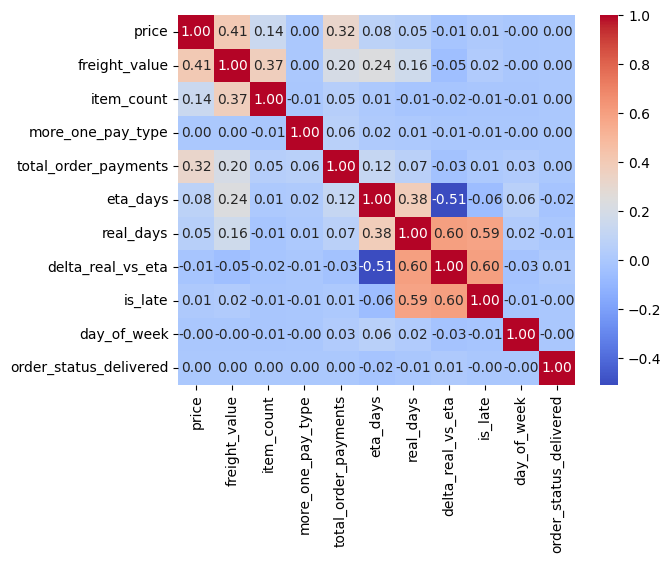

                  Variable           VIF
0                    const  16007.976805
1                    price      1.294394
2            freight_value      1.474582
3               item_count      1.176251
4        more_one_pay_type      1.004418
5     total_order_payments      1.143043
6                 eta_days    346.478475
7                real_days    400.858143
8        delta_real_vs_eta    461.657158
9                  is_late      1.795210
10             day_of_week      1.005200
11  order_status_delivered      1.000621


In [ ]:
#CORRELACION
corr_matrix = X.corr()
sns.heatmap(corr_matrix,cmap='coolwarm',fmt=".2f", annot=True)
plt.show()

#VIF(Factor de Inflación de la Varianza)
#Es una medida que indica el grado de multicolinealidad entre las variables predictoras de un modelo.

# Agregamos una constante (intercepto) a X
X_const = add_constant(X)

# Calculamos el VIF para cada columna
vif_data = pd.DataFrame()
vif_data["Variable"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_data)

In [ ]:
#Como vimos en clase de Eleonora el VIF de eta_days, real_days y delta_real_vs_eta está indicando que hay una multicolinealidad grave en el modelo
#VIF>10 :MULTICOL; VIF>4: mirar; VIF<4: ok

In [ ]:
#Remover variables con multicolinealidad
X = df_todo_reg.drop(["review_score","eta_days"], axis=1)

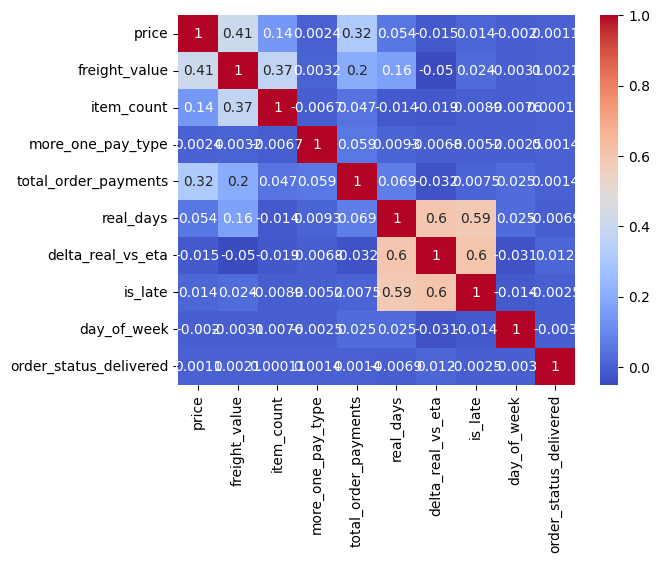

                  Variable           VIF
0                    const  16003.464001
1                    price      1.294163
2            freight_value      1.474572
3               item_count      1.176212
4        more_one_pay_type      1.004047
5     total_order_payments      1.131111
6                real_days      1.924835
7        delta_real_vs_eta      1.907596
8                  is_late      1.794828
9              day_of_week      1.004971
10  order_status_delivered      1.000594


In [ ]:
#Probar nuevamente correlacion y multicolinealidad

#CORRELACION
corr_matrix = X.corr()
sns.heatmap(corr_matrix,cmap='coolwarm', annot=True)
plt.show()

#VIF
# Agregamos una constante (intercepto) a X
X_const = add_constant(X)

# Calculamos el VIF para cada columna
vif_data = pd.DataFrame()
vif_data["Variable"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_data)

In [ ]:
#Aunque la correlacion de varias variables esta alta el VIF nos indica que ya podemos continuar

In [ ]:
#Escalar las variables (Ya que hay desbalanceo)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Crear un modelo de Regresión Lineal
model = LinearRegression()

#Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)

#Evaluar en entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print(f'Error cuadrático medio (Train): {mse_train:.4f}')
print(f'R² (Train): {r2_train:.4f}')

#Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_test_pred = model.predict(X_test)

#Evaluar el modelo en test
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
print(f'Error cuadrático medio (Test): {mse_test:.4f}')
print(f'R² (Test): {r2_test:.4f}')

#Accuracy del modelo redondeando
y_test_round = y_test.round().astype(int)
y_pred_round = np.round(y_test_pred).astype(int)
accuracy_con_outliers = accuracy_score(y_test_round, y_pred_round)
print(f"Precisión del modelo: {accuracy_con_outliers}")

#Coeficientes del modelo
coef = pd.Series(model.coef_, index=X.columns)
print("\nPesos (coeficientes) del modelo final:")
print(coef.sort_values(ascending=False))

Error cuadrático medio (Train): 1.3813
R² (Train): 0.1624
Error cuadrático medio (Test): 1.3750
R² (Test): 0.1682
Precisión del modelo: 0.2293268394503392

Pesos (coeficientes) del modelo final:
order_status_delivered    3.106164
more_one_pay_type         0.005788
price                     0.000037
freight_value            -0.001373
delta_real_vs_eta        -0.001650
day_of_week              -0.005055
total_order_payments     -0.006258
real_days                -0.023243
item_count               -0.043004
is_late                  -1.208698
dtype: float64


Sin outliers

In [ ]:
#Dividir los datos en conjuntos de entrenamiento y prueba
X = df_reg_clean.drop(['review_score',"eta_days"], axis=1)
y = df_reg_clean['review_score'].astype(int)

#Escalar las variables (Ya que hay desbalanceo)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Crear un modelo de Regresión Lineal
model = LinearRegression()

#Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)

#Evaluar en entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print(f'Error cuadrático medio (Train): {mse_train:.4f}')
print(f'R² (Train): {r2_train:.4f}')

#Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_test_pred = model.predict(X_test)

#Evaluar el modelo en test
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
print(f'Error cuadrático medio (Test): {mse_test:.4f}')
print(f'R² (Test): {r2_test:.4f}')

#Accuracy del modelo redondeando
y_test_round = y_test.round().astype(int)
y_pred_round = np.round(y_test_pred).astype(int)
accuracy_sin_outliers = accuracy_score(y_test_round, y_pred_round)
print(f"Precisión del modelo: {accuracy_sin_outliers}")

#Coeficientes del modelo
coef = pd.Series(model.coef_, index=X.columns)
print("\nPesos (coeficientes) del modelo final:")
print(coef.sort_values(ascending=False))

Error cuadrático medio (Train): 1.3144
R² (Train): 0.1267
Error cuadrático medio (Test): 1.3249
R² (Test): 0.1257
Precisión del modelo: 0.2839293901879872

Pesos (coeficientes) del modelo final:
freight_value             0.001832
price                    -0.000010
total_order_payments     -0.003543
delta_real_vs_eta        -0.004818
day_of_week              -0.008948
real_days                -0.027580
more_one_pay_type        -0.040786
item_count               -0.232010
order_status_delivered   -0.331230
is_late                  -1.029536
dtype: float64


In [ ]:
if accuracy_sin_outliers > accuracy_con_outliers:
    print("El modelo sin outliers es mejor.")
elif accuracy_sin_outliers < accuracy_con_outliers:
    print("El modelo con outliers es mejor.")
else:
    print("Son iguales")

El modelo sin outliers es mejor.


Removiendo los outliers obtenemos un mejor resultado pero realmente el modelo no es el adecuado debido al alto numero de error cuadratico medio y r^2 que nos dice que solo explica menos del 20% de la varianza del modelo.

# Arbol de Decision

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = df_todo_rf.drop('review_score', axis=1)
y = df_todo_rf['review_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Crear un modelo de árbol de decisión
model = DecisionTreeClassifier(min_samples_split=50,max_depth=3,random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo en train
y_train_pred = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f'Precisión del modelo en Train: {accuracy_train}')

# Calcular la precisión del modelo
accuracy_arbol = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo en test: {accuracy_arbol}')

Precisión del modelo en Train: 0.619711939883106
Precisión del modelo en test: 0.6193184783175912


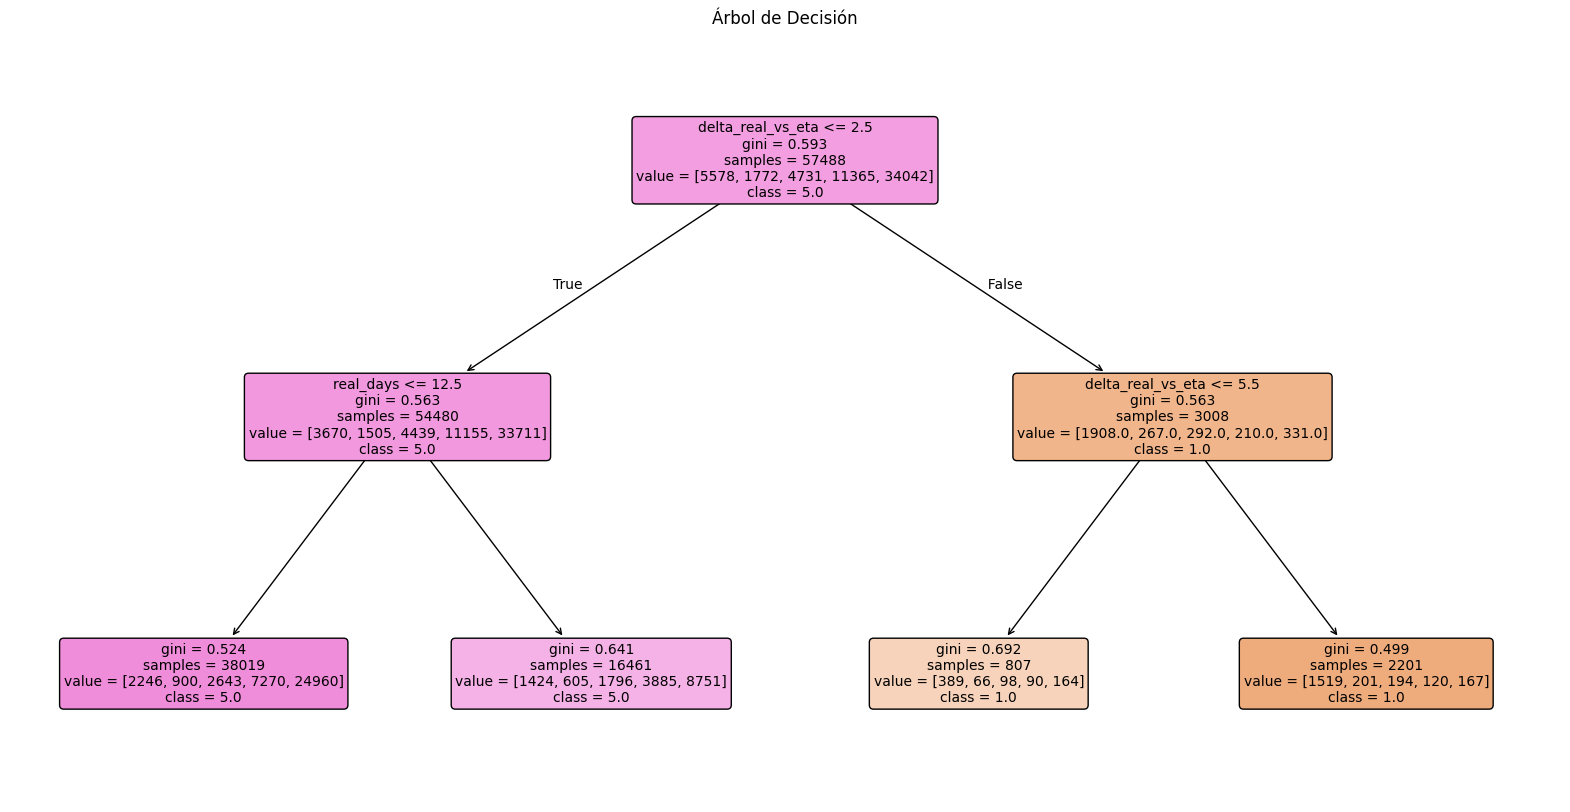

In [ ]:
#Visualizar el modelo generado con target discreto
plt.figure(figsize=(20,10))  # Ajusta el tamaño según lo complejo del árbol
plot_tree(model,
          feature_names=X.columns,
          class_names=[str(cls) for cls in model.classes_],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Árbol de Decisión")
plt.show()


Prueba de Arbol de Decision con target binario

In [ ]:
#Dividir los datos en conjuntos de entrenamiento y prueba
X = df_todo_reglog.drop('review_bueno', axis=1)
y = df_todo_reglog['review_bueno']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Crear un modelo de árbol de decisión
model = DecisionTreeClassifier(min_samples_split=50,max_depth=3,random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo en train
y_train_pred = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f'Precisión del modelo en Train: {accuracy_train}')

# Calcular la precisión del modelo
accuracy_arbol_binario = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo en test: {accuracy_arbol_binario}')

Precisión del modelo en Train: 0.8233544391873087
Precisión del modelo en test: 0.822600845379116


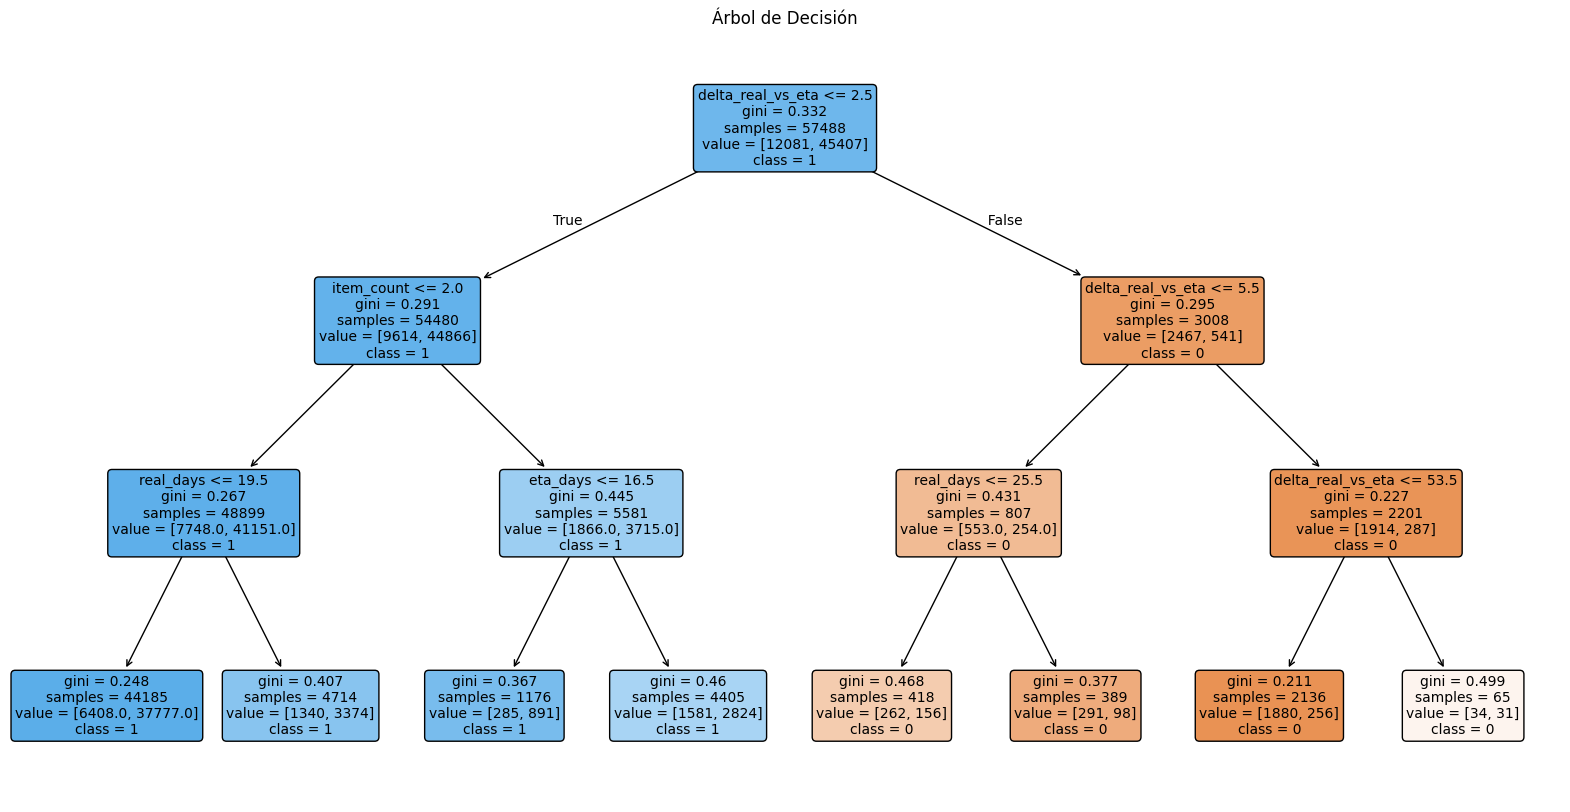

In [ ]:
#Visualizar el modelo generado con target binario
plt.figure(figsize=(20,10))  # Ajusta el tamaño según lo complejo del árbol
plot_tree(model,
          feature_names=X.columns,
          class_names=[str(cls) for cls in model.classes_],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Árbol de Decisión")
plt.show()


# Random Forest

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = df_todo_rf.drop('review_score', axis=1)
y = df_todo_rf['review_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100,random_state=42)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calcular la precisión del modelo en train
y_train_pred = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f'Precisión del modelo en Train: {accuracy_train}')

# Calcular la precisión del modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Precisión del modelo en test: {accuracy_rf}')

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Precisión del modelo en Train: 0.064630598426635
Precisión del modelo en test: 0.5945311276939936

Classification Report:
               precision    recall  f1-score   support

         1.0       0.56      0.36      0.43      1853
         2.0       0.00      0.00      0.00       598
         3.0       0.10      0.01      0.02      1611
         4.0       0.24      0.06      0.09      3788
         5.0       0.62      0.93      0.75     11313

    accuracy                           0.59     19163
   macro avg       0.30      0.27      0.26     19163
weighted avg       0.48      0.59      0.50     19163

Confusion Matrix:
 [[  660     9    22    67  1095]
 [  103     0     7    25   463]
 [  129     4    20    75  1383]
 [  106     2    39   210  3431]
 [  191    15   104   500 10503]]


Misma conclusion del arbol de decision anterior

Prueba del Random Forest con target binario

In [ ]:
#Dividir los datos en conjuntos de entrenamiento y prueba
X = df_todo_reglog.drop('review_bueno', axis=1)
y = df_todo_reglog['review_bueno']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100,random_state=42)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calcular la precisión del modelo en train
y_train_pred = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f'Precisión del modelo en Train: {accuracy_train}')

# Calcular la precisión del modelo
accuracy_rf_binario = accuracy_score(y_test, y_pred_rf)
print(f'Precisión del modelo en test: {accuracy_rf_binario}')

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Precisión del modelo en Train: 0.8231725613494931
Precisión del modelo en test: 0.8156342952564839

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.24      0.36      4062
           1       0.83      0.97      0.89     15101

    accuracy                           0.82     19163
   macro avg       0.75      0.61      0.63     19163
weighted avg       0.80      0.82      0.78     19163

Confusion Matrix:
 [[  994  3068]
 [  465 14636]]


#KNN

In [ ]:
X = df_todo_rf.drop('review_score', axis=1)
y = df_todo_rf['review_score'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear pipeline con escalado (KNN es sensible a escalas)
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))  # puedes probar con distintos k
])

# Entrenar
knn_pipeline.fit(X_train, y_train)

# Predecir
y_pred_knn = knn_pipeline.predict(X_test)

#Calcular el accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Evaluar
print("🔸 K-Nearest Neighbors Classifier")
print(f'Precisión del modelo en test: {accuracy_knn}')
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


🔸 K-Nearest Neighbors Classifier
Precisión del modelo en test: 0.523091374001983

Classification Report:
               precision    recall  f1-score   support

           1       0.41      0.37      0.39      1853
           2       0.06      0.01      0.02       598
           3       0.10      0.05      0.07      1611
           4       0.22      0.17      0.19      3788
           5       0.63      0.76      0.69     11313

    accuracy                           0.52     19163
   macro avg       0.29      0.27      0.27     19163
weighted avg       0.47      0.52      0.49     19163

Confusion Matrix:
 [[ 690   29   71  202  861]
 [ 127    8   29   79  355]
 [ 181   15   80  263 1072]
 [ 200   24  163  630 2771]
 [ 467   52  424 1754 8616]]


Prueba del KNN si se hace con la variable objetivo binaria

In [ ]:
#Dividir los datos en conjuntos de entrenamiento y prueba
X = df_todo_reglog.drop('review_bueno', axis=1)
y = df_todo_reglog['review_bueno']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear pipeline con escalado (KNN es sensible a escalas)
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))  # puedes probar con distintos k
])

# Entrenar
knn_pipeline.fit(X_train, y_train)

# Predecir
y_pred_knn = knn_pipeline.predict(X_test)

#Calcular el accuracy
accuracy_knn_binario = accuracy_score(y_test, y_pred_knn)

# Evaluar
print("🔸 K-Nearest Neighbors Classifier")
print(f'Precisión del modelo en test: {accuracy_knn_binario}')
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


🔸 K-Nearest Neighbors Classifier
Precisión del modelo en test: 0.799352919688984

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.27      0.36      4062
           1       0.83      0.94      0.88     15101

    accuracy                           0.80     19163
   macro avg       0.69      0.60      0.62     19163
weighted avg       0.77      0.80      0.77     19163

Confusion Matrix:
 [[ 1079  2983]
 [  862 14239]]


#Resultado Final


In [ ]:
#Codigo para decidir que modelo es el indicado basado en los accuracy scores

accuracy_modelos = {
    "Regresion Logistica": accuracy_reglog,
    "Regresion Lineal (con outliers)": accuracy_con_outliers,
    "Regresion Lineal (sin outliers)": accuracy_sin_outliers,
    "Arbol de Decision": accuracy_arbol,
    "Random Forest": accuracy_rf,
    "KNN": accuracy_knn
}

mejor_modelo = max(accuracy_modelos, key=accuracy_modelos.get)
mejor_accuracy = accuracy_modelos[mejor_modelo]

print("Comparacion Accuracy de Modelos:\n")
for nombre_modelo, accuracy in accuracy_modelos.items():
    print(f"{nombre_modelo}: {accuracy:.4f}")

print(f"\nEl modelo a utilizar es el siguiente: {mejor_modelo} con un accuracy de {mejor_accuracy:.4f}")


Comparacion Accuracy de Modelos:

Regresion Logistica: 0.8165
Regresion Lineal (con outliers): 0.2293
Regresion Lineal (sin outliers): 0.2839
Arbol de Decision: 0.6193
Random Forest: 0.5945
KNN: 0.5231

El modelo a utilizar es el siguiente: Regresion Logistica con un accuracy de 0.8165


Comparacion de modelos con la prueba de hacerlos con target binario

In [ ]:
#Codigo para decidir que modelo es el indicado basado en los accuracy scores

accuracy_modelos = {
    "Regresion Logistica": accuracy_reglog,
    "Arbol de Decision": accuracy_arbol_binario,
    "Random Forest": accuracy_rf_binario,
    "KNN": accuracy_knn_binario
}

mejor_modelo = max(accuracy_modelos, key=accuracy_modelos.get)
mejor_accuracy = accuracy_modelos[mejor_modelo]

print("Comparacion Accuracy de Modelos usando un target binario:\n")
for nombre_modelo, accuracy in accuracy_modelos.items():
    print(f"{nombre_modelo}: {accuracy:.4f}")

print(f"\nEl modelo a utilizar es el siguiente: {mejor_modelo} con un accuracy de {mejor_accuracy:.4f}")

Comparacion Accuracy de Modelos usando un target binario:

Regresion Logistica: 0.8165
Arbol de Decision: 0.8226
Random Forest: 0.8156
KNN: 0.7994

El modelo a utilizar es el siguiente: Arbol de Decision con un accuracy de 0.8226


In [ ]:
df_todo_tarde = df_late_orders = df_todo[df_todo["is_late"] == 1]
df_todo_tarde.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,price,freight_value,item_count,more_one_pay_type,total_order_payments,eta_days,real_days,delta_real_vs_eta,is_late,day_of_week
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,38cae21b1b57a95959440380d5b2ef7a,2.0,...,109.90,8.96,1.0,False,1.0,8,20,11,1,0
25,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,6a1a8e54de03ab98e6e8ff56e56e507f,2.0,...,109.90,15.53,1.0,False,1.0,17,27,9,1,1
35,8563039e855156e48fccee4d611a3196,5f16605299d698660e0606f7eae2d2f9,delivered,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-03-20,f121467a10eee0929f364c7d62abc9b5,5.0,...,78.00,28.95,1.0,False,4.0,30,30,0,1,5
41,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,5caca29ffffe9086162ca51303817420,1.0,...,339.00,17.12,1.0,False,10.0,25,33,7,1,4
57,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,4ff7c437ae60fa0b3c700ade55155027,1.0,...,45.98,45.70,3.0,False,9.0,23,24,1,1,4


In [ ]:
df_todo_bien = df_late_orders = df_todo[df_todo["is_late"] == 0]
df_todo_bien.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,price,freight_value,item_count,more_one_pay_type,total_order_payments,eta_days,real_days,delta_real_vs_eta,is_late,day_of_week
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,29.99,8.72,1.0,True,3.0,15,8,-8,0,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4.0,...,118.70,22.76,1.0,False,1.0,17,12,-6,0,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5.0,...,159.90,19.22,1.0,False,3.0,26,9,-18,0,2
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5.0,...,45.00,27.20,1.0,False,1.0,26,13,-13,0,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5.0,...,19.90,8.72,1.0,False,1.0,12,2,-10,0,1


In [ ]:
total_price_late = df_late_orders["price"].sum()
print(f"Total de ventas (price) en órdenes tardías: {total_price_late:.2f}")


Total de ventas (price) en órdenes tardías: 11983348.55


In [ ]:
total_price_bien = df_todo_bien["price"].sum()
print(f"Total de ventas (price) en órdenes buenas: {total_price_bien:.2f}")


Total de ventas (price) en órdenes buenas: 11983348.55


In [ ]:
total_price = df_todo["price"].sum()
print(f"Total de ventas (price) en todas las órdenes: {total_price:.2f}")

Total de ventas (price) en todas las órdenes: 13107406.23


In [ ]:
porc_fact = (total_price_late/total_price)*100
print(f"Porcentaje de ventas (price) en órdenes tardías: {porc_fact:.2f}%")

Porcentaje de ventas (price) en órdenes tardías: 91.42%
